In [91]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn
import pickle
import contextlib
from tqdm import tqdm  # Import tqdm for progress bar


import DiadFit as pf
pf.__version__

'1.0.5'

In [92]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [93]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +slash+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +slash+'Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

### For now, drop totals <97 and over 104> some were really hard to get anything for so don't want to be too stringent 

In [99]:
crystals=pd.read_excel('KAM_EDS_12062024.xlsx',sheet_name='concatenated_olivines')

crystal_reps=pd.read_excel('Helper_file_120624.xlsx',sheet_name='Crystals_EDS_reps')
crystals = crystals.loc[:, ~crystals.columns.str.contains('^Unnamed')]

crystals_wnames=pd.merge(left=crystal_reps,right=crystals,on=['Name_windex'],how='left')

# crystals_wnames[crystals_wnames['Total_Oxide%']>104][['Total_Oxide%','Sample Name_x']]
# # crystals_wnames[crystals_wnames['Sample Name_x'].str.contains("KA611_c101_a1")][['Total_Oxide%','Sample Name_x']]

crystals_wnames=crystals_wnames[(crystals_wnames['Total_Oxide%'].between(97,104))&~(crystals_wnames['Sample'].str.contains('AMG'))]

crystals_wnames


,Index,Sample Name_x,Name_windex,Type,Name_Full_xtal,Sample,Crystal,Sample_crystal,Sample Name_y,Predict_Mineral,...,#_ions__O,#_ions__Mg,#_ions__Si,#_ions__Ca,#_ions__Cr,#_ions__Mn,#_ions__Fe,#_ions__Ni,Fo,K2O
0,0,KA69_c400_a1,KA69_c400_a1_0,Olivine,KA69_c400_a1,KA69,c400,KA69_c400,KA69_c400_a1,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,KA69_c400_a2,KA69_c400_a2_1,Olivine,KA69_c400_a2,KA69,c400,KA69_c400,KA69_c400_a2,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,KA69_c400_a3,KA69_c400_a3_2,Olivine,KA69_c400_a3,KA69,c400,KA69_c400,KA69_c400_a3,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,KA69_c401_a1,KA69_c401_a1_3,Olivine,KA69_c401_a1,KA69,c401,KA69_c401,KA69_c401_a1,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,KA69_c402_a1,KA69_c402_a1_4,Olivine,KA69_c402_a1,KA69,c402,KA69_c402,KA69_c402_a1,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,681,187-1-111-reg3,187-1-111-reg3_681,Olivine,187-1-111-reg3,KA71,c111,KA71_c111,187-1-111-reg3,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.874456,0
682,682,187-1-111-reg4,187-1-111-reg4_682,Olivine,187-1-111-reg4,KA71,c111,KA71_c111,187-1-111-reg4,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880375,0
683,683,187-1-111-reg5,187-1-111-reg5_683,Olivine,187-1-111-reg5,KA71,c111,KA71_c111,187-1-111-reg5,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.876892,0
684,684,187-1-111-reg6,187-1-111-reg6_684,Olivine,187-1-111-reg6,KA71,c111,KA71_c111,187-1-111-reg6,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881516,0


In [100]:
## Filter the crystals (to ignore EDS spots when WDS is available)

# This part is to filter out rows which have EDS AND WDS so only the WDS is kept to average
base_names = set(crystals_wnames['Sample Name_x'].str.rstrip('_WDS'))

def filter_rows(row):
    base_name = row.rstrip('_WDS')
    if row.endswith('_WDS'):
        return True 
    elif f"{base_name}_WDS" not in list(crystals_wnames['Sample Name_x']):

        return True
    else:
        return False

crystals_filtered = crystals_wnames[crystals_wnames['Sample Name_x'].apply(filter_rows)]

crystals_filtered

,Index,Sample Name_x,Name_windex,Type,Name_Full_xtal,Sample,Crystal,Sample_crystal,Sample Name_y,Predict_Mineral,...,#_ions__O,#_ions__Mg,#_ions__Si,#_ions__Ca,#_ions__Cr,#_ions__Mn,#_ions__Fe,#_ions__Ni,Fo,K2O
0,0,KA69_c400_a1,KA69_c400_a1_0,Olivine,KA69_c400_a1,KA69,c400,KA69_c400,KA69_c400_a1,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,KA69_c400_a2,KA69_c400_a2_1,Olivine,KA69_c400_a2,KA69,c400,KA69_c400,KA69_c400_a2,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,KA69_c400_a3,KA69_c400_a3_2,Olivine,KA69_c400_a3,KA69,c400,KA69_c400,KA69_c400_a3,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,KA69_c401_a1,KA69_c401_a1_3,Olivine,KA69_c401_a1,KA69,c401,KA69_c401,KA69_c401_a1,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,KA69_c402_a1,KA69_c402_a1_4,Olivine,KA69_c402_a1,KA69,c402,KA69_c402,KA69_c402_a1,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,681,187-1-111-reg3,187-1-111-reg3_681,Olivine,187-1-111-reg3,KA71,c111,KA71_c111,187-1-111-reg3,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.874456,0
682,682,187-1-111-reg4,187-1-111-reg4_682,Olivine,187-1-111-reg4,KA71,c111,KA71_c111,187-1-111-reg4,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880375,0
683,683,187-1-111-reg5,187-1-111-reg5_683,Olivine,187-1-111-reg5,KA71,c111,KA71_c111,187-1-111-reg5,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.876892,0
684,684,187-1-111-reg6,187-1-111-reg6_684,Olivine,187-1-111-reg6,KA71,c111,KA71_c111,187-1-111-reg6,Olivine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881516,0


In [101]:
crystals=crystals_filtered[['Sample Name_x','Name_Full_xtal','Sample','Sample_crystal','Predict_Mineral','Al2O3','CaO','Cr2O3','FeOt','K2O','MgO','MnO','Na2O','NiO','SiO2','TiO2',
             'Oxide % Sigma_Al2O3','Oxide % Sigma_CaO','Oxide % Sigma_Cr2O3','Oxide % Sigma_FeOt','Oxide % Sigma_MgO',
             'Oxide % Sigma_MnO','Oxide % Sigma_Na2O','Oxide % Sigma_NiO','Oxide % Sigma_SiO2','Oxide % Sigma_TiO2']].copy()

def assign_inclusion_type(row):
    if pd.isna(row['Sample_crystal']) or "c2" not in str(row['Sample_crystal']):
        return 'FI'
    return 'MI'

crystals.loc[:, 'Inclusion type'] = crystals.apply(assign_inclusion_type, axis=1)
crystals.insert(4,'Inclusion type',crystals.pop('Inclusion type'))
crystals

,Sample Name_x,Name_Full_xtal,Sample,Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,...,Oxide % Sigma_Al2O3,Oxide % Sigma_CaO,Oxide % Sigma_Cr2O3,Oxide % Sigma_FeOt,Oxide % Sigma_MgO,Oxide % Sigma_MnO,Oxide % Sigma_Na2O,Oxide % Sigma_NiO,Oxide % Sigma_SiO2,Oxide % Sigma_TiO2
0,KA69_c400_a1,KA69_c400_a1,KA69,KA69_c400,FI,Olivine,NaN,0.3600,0.03,14.9300,...,NaN,0.0100,0.01,0.0400,0.0600,0.0200,NaN,0.0200,0.0600,NaN
1,KA69_c400_a2,KA69_c400_a2,KA69,KA69_c400,FI,Olivine,NaN,0.3400,0.04,15.0700,...,NaN,0.0100,0.01,0.0400,0.0600,0.0200,NaN,0.0200,0.0600,NaN
2,KA69_c400_a3,KA69_c400_a3,KA69,KA69_c400,FI,Olivine,NaN,0.3600,0.03,15.3700,...,NaN,0.0100,0.01,0.0400,0.0600,0.0200,NaN,0.0200,0.0600,NaN
3,KA69_c401_a1,KA69_c401_a1,KA69,KA69_c401,FI,Olivine,NaN,0.3600,0.02,15.5400,...,NaN,0.0100,0.01,0.0400,0.0600,0.0200,NaN,0.0200,0.0600,NaN
4,KA69_c402_a1,KA69_c402_a1,KA69,KA69_c402,FI,Olivine,NaN,0.3600,0.00,14.9600,...,NaN,0.0100,0.01,0.0400,0.0600,0.0200,NaN,0.0200,0.0600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,187-1-111-reg3,187-1-111-reg3,KA71,KA71_c111,FI,Olivine,NaN,0.3486,NaN,11.8965,...,NaN,0.0244,NaN,0.0873,0.1235,0.0345,NaN,0.0102,0.1357,NaN
682,187-1-111-reg4,187-1-111-reg4,KA71,KA71_c111,FI,Olivine,NaN,0.2936,NaN,11.5140,...,NaN,0.0247,NaN,0.0883,0.1274,0.0354,NaN,0.0104,0.1403,NaN
683,187-1-111-reg5,187-1-111-reg5,KA71,KA71_c111,FI,Olivine,NaN,0.2787,NaN,11.7026,...,NaN,0.0243,NaN,0.0870,0.1238,0.0346,NaN,0.0103,0.1362,NaN
684,187-1-111-reg6,187-1-111-reg6,KA71,KA71_c111,FI,Olivine,NaN,0.3290,NaN,11.2923,...,NaN,0.0244,NaN,0.0858,0.1239,0.0343,NaN,0.0105,0.1361,NaN


In [102]:
# Function to calculate mean excluding NaN and 0 values
def mean_excluding_nan_zero(series):
    return series[~series.isna() & (series != 0)].mean()

# Group by 'Name_Full_xtal'
grouped = crystals.groupby('Name_Full_xtal')
numeric_cols_ol = crystals.select_dtypes(include='number')
non_numeric_cols = crystals.select_dtypes(exclude='number')

numeric_crystalspot_averaged_mean = grouped[numeric_cols_ol.columns].agg(mean_excluding_nan_zero)

numeric_crystalspot_averaged_std = grouped[numeric_cols_ol.columns].std()
non_numeric_crystalspot_averaged = grouped[non_numeric_cols.columns].first()

crystalspot_averaged = pd.concat([numeric_crystalspot_averaged_mean, non_numeric_crystalspot_averaged], axis=1)

crystalspot_averaged = crystalspot_averaged.reindex(columns=crystals.columns)

# std_columns = numeric_crystalspot_averaged_std.add_suffix('_spot_std')

# crystalspot_averaged = pd.concat([crystalspot_averaged, std_columns], axis=1)

crystalspot_averaged = crystalspot_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')
row_counts['spot averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'spot averaged?'] = 'Yes'
crystalspot_averaged = pd.merge(crystalspot_averaged, row_counts[['Name_Full_xtal', 'spot averaged?']], on='Name_Full_xtal', how='outer')
crystalspot_averaged['spot averaged?'] = crystalspot_averaged['spot averaged?'].fillna('No')

crystalspot_averaged.to_clipboard(excel=True, index=False)
crystalspot_averaged.to_excel(compilation_folder+'/'+"KAM_crystals_averaged_spots.xlsx")
crystalspot_averaged


,Sample Name_x,Name_Full_xtal,Sample,Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,...,Oxide % Sigma_CaO,Oxide % Sigma_Cr2O3,Oxide % Sigma_FeOt,Oxide % Sigma_MgO,Oxide % Sigma_MnO,Oxide % Sigma_Na2O,Oxide % Sigma_NiO,Oxide % Sigma_SiO2,Oxide % Sigma_TiO2,spot averaged?
0,187-1-101-reg1,187-1-101-reg1,KA71,KA71_c101,FI,Olivine,NaN,0.3078,NaN,12.8572,...,0.0229,NaN,0.0847,0.1161,0.0327,NaN,0.0432,0.1276,NaN,No
1,187-1-101-reg2,187-1-101-reg2,KA71,KA71_c101,FI,Olivine,NaN,0.3442,NaN,12.7108,...,0.0244,NaN,0.0899,0.1239,0.0349,NaN,0.0096,0.1364,NaN,No
2,187-1-101-reg3,187-1-101-reg3,KA71,KA71_c101,FI,Olivine,NaN,0.3298,NaN,12.5571,...,0.0243,NaN,0.0896,0.1231,0.0346,NaN,0.0098,0.1354,NaN,No
3,187-1-102-A,187-1-102-A,KA71,KA71_c102,FI,Olivine,NaN,0.3671,NaN,13.7361,...,0.0249,NaN,0.0930,0.1248,0.0351,NaN,0.0095,0.1373,NaN,No
4,187-1-102-B,187-1-102-B,KA71,KA71_c102,FI,Olivine,NaN,0.3870,NaN,13.5197,...,0.0247,NaN,0.0930,0.1252,0.0352,NaN,0.0094,0.1377,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,KA79_c503_a2,KA79_c503_a2,KA79,KA79_c503,FI,Olivine,NaN,0.3061,0.0727,14.0268,...,0.0125,0.0172,0.0498,0.0665,0.0184,NaN,0.0242,0.0731,NaN,No
497,KA79_c503_a3,KA79_c503_a3,KA79,KA79_c503,FI,Olivine,NaN,0.3061,NaN,13.0582,...,0.0126,NaN,0.0483,0.0666,0.0182,NaN,0.0243,0.0731,NaN,No
498,KA79_c504_a1,KA79_c504_a1,KA79,KA79_c504,FI,Olivine,NaN,0.2474,0.0854,11.1310,...,0.0124,0.0172,0.0453,0.0667,0.0180,NaN,0.0243,0.0733,NaN,No
499,KA79_c505_a1,KA79_c505_a1,KA79,KA79_c505,FI,Olivine,NaN,0.2502,0.1141,10.9196,...,0.0123,0.0174,0.0450,0.0668,0.0179,NaN,0.0242,0.0735,NaN,No


## Now average crystal composition per crystal

In [103]:
# Function to calculate mean excluding NaN and 0 values
def mean_excluding_nan_zero(series):
    return series[~series.isna() & (series != 0)].mean()

# Group by 'Name_Full_xtal'
grouped = crystalspot_averaged.groupby('Sample_crystal')
numeric_cols_ol = crystalspot_averaged.select_dtypes(include='number')
non_numeric_cols = crystalspot_averaged.select_dtypes(exclude='number')

numeric_df_averaged_mean = grouped[numeric_cols_ol.columns].agg(mean_excluding_nan_zero)

numeric_df_averaged_std = grouped[numeric_cols_ol.columns].std()
non_numeric_df_averaged = grouped[non_numeric_cols.columns].first()

df_averaged = pd.concat([numeric_df_averaged_mean, non_numeric_df_averaged], axis=1)

df_averaged = df_averaged.reindex(columns=crystalspot_averaged.columns)

std_columns = numeric_df_averaged_std.add_suffix('_crystal_std')

df_averaged = pd.concat([df_averaged, std_columns], axis=1)

df_averaged = df_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')
row_counts['crystal averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'crystal averaged?'] = 'Yes'
df_averaged = pd.merge(df_averaged, row_counts[['Sample_crystal', 'crystal averaged?']], on='Sample_crystal', how='outer')
df_averaged['crystal averaged?'] = df_averaged['crystal averaged?'].fillna('No')

df_averaged=df_averaged.drop(['Sample Name_x','Name_Full_xtal'], axis=1, inplace=False)
df_averaged=df_averaged.dropna(axis=1, how='all', inplace=False)


df_averaged['Total (wt%)'] = df_averaged.iloc[:, 4:14].sum(axis=1)
df_averaged.insert(1, 'Total (wt%)', df_averaged.pop('Total (wt%)'))

for col in df_averaged.columns[5:15]:
    df_averaged[f'{col}_wt%uncertainty ({col}_crystal_std when it was averaged by crystal, {col}_Oxide sigma% when it was a single spot)'] = df_averaged.apply(
        lambda row: row[f'{col}_crystal_std'] if row['crystal averaged?'] != 'No' else row[f'Oxide % Sigma_{col}'], axis=1)
    

df_averaged.to_clipboard(excel=True, index=False)
df_averaged.to_excel(compilation_folder+'/'+"KAM_crystals_averagedbycrystal.xlsx")

df_averaged


,Sample,Total (wt%),Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,MgO,...,"Al2O3_wt%uncertainty (Al2O3_crystal_std when it was averaged by crystal, Al2O3_Oxide sigma% when it was a single spot)","CaO_wt%uncertainty (CaO_crystal_std when it was averaged by crystal, CaO_Oxide sigma% when it was a single spot)","Cr2O3_wt%uncertainty (Cr2O3_crystal_std when it was averaged by crystal, Cr2O3_Oxide sigma% when it was a single spot)","FeOt_wt%uncertainty (FeOt_crystal_std when it was averaged by crystal, FeOt_Oxide sigma% when it was a single spot)","MgO_wt%uncertainty (MgO_crystal_std when it was averaged by crystal, MgO_Oxide sigma% when it was a single spot)","MnO_wt%uncertainty (MnO_crystal_std when it was averaged by crystal, MnO_Oxide sigma% when it was a single spot)","Na2O_wt%uncertainty (Na2O_crystal_std when it was averaged by crystal, Na2O_Oxide sigma% when it was a single spot)","NiO_wt%uncertainty (NiO_crystal_std when it was averaged by crystal, NiO_Oxide sigma% when it was a single spot)","SiO2_wt%uncertainty (SiO2_crystal_std when it was averaged by crystal, SiO2_Oxide sigma% when it was a single spot)","TiO2_wt%uncertainty (TiO2_crystal_std when it was averaged by crystal, TiO2_Oxide sigma% when it was a single spot)"
0,KA611,100.448300,KA611_c101,FI,Olivine,NaN,0.383650,0.04625,13.644300,45.8121,...,NaN,0.014920,0.019304,0.104086,2.360747,0.016617,NaN,0.008061,1.992839,NaN
1,KA611,99.004200,KA611_c102,FI,Olivine,NaN,0.450100,0.04490,13.202300,45.2951,...,NaN,0.011200,0.014600,0.041900,0.056900,0.015700,NaN,0.020600,0.062600,NaN
2,KA611,99.467500,KA611_c103,FI,Olivine,NaN,0.422200,0.02280,13.362500,45.3724,...,NaN,0.011100,0.014600,0.042100,0.057000,0.015700,NaN,0.020500,0.062700,NaN
3,KA611,99.919700,KA611_c104,FI,Olivine,NaN,0.442000,0.04200,13.267000,45.7308,...,NaN,0.011200,0.014600,0.042000,0.057200,0.015800,NaN,0.020600,0.062900,NaN
4,KA611,98.933100,KA611_c105,FI,Olivine,NaN,0.413300,0.05250,13.347900,45.1865,...,NaN,0.011100,0.014600,0.042000,0.056900,0.015800,NaN,0.020700,0.062500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,KA79,100.366600,KA79_c502,FI,Olivine,NaN,0.255000,0.11350,10.915200,48.0305,...,NaN,0.012300,0.017200,0.045000,0.066800,0.018100,NaN,0.024300,0.073500,NaN
254,KA79,100.442167,KA79_c503,FI,Olivine,NaN,0.305933,0.07270,13.349533,46.0873,...,NaN,0.000289,NaN,0.588434,0.371135,0.018032,NaN,0.014068,0.029251,NaN
255,KA79,100.110800,KA79_c504,FI,Olivine,NaN,0.247400,0.08540,11.131000,47.7381,...,NaN,0.012400,0.017200,0.045300,0.066700,0.018000,NaN,0.024300,0.073300,NaN
256,KA79,100.421700,KA79_c505,FI,Olivine,NaN,0.250200,0.11410,10.919600,48.0741,...,NaN,0.012300,0.017400,0.045000,0.066800,0.017900,NaN,0.024200,0.073500,NaN


In [122]:
# basan=df_averaged['Sample'].str.contains('KA611')
# alkbas=df_averaged['Sample'].str.contains('KA71')
# EFthol=df_averaged['Sample'].str.contains('KA79|KA78')
# thol96=df_averaged['Sample'].str.contains('KA961')
# trans=df_averaged['Sample'].str.contains('KA69')

df_averaged.loc[:,'Ca_ppm']=10000*df_averaged['CaO']*40.078/56.0774
df_averaged.loc[:,'Ni_ppm']=10000*df_averaged['NiO']*58.6934/74.6928
df_averaged.loc[:,'Mn_ppm']=10000*df_averaged['MnO']*54.938044/70.9374
df_averaged.loc[:,'Fe_ppm']=10000*df_averaged['FeOt']*55.845/71.844
df_averaged.loc[:,'Fo_host']=100*(df_averaged['MgO']/40.3044)/((df_averaged['MgO']/40.3044)+(df_averaged['FeOt']/71.844))



ols=df_averaged[df_averaged['Predict_Mineral'].str.contains('Olivine')]
ols.head()

,Sample,Total (wt%),Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,MgO,...,"MnO_wt%uncertainty (MnO_crystal_std when it was averaged by crystal, MnO_Oxide sigma% when it was a single spot)","Na2O_wt%uncertainty (Na2O_crystal_std when it was averaged by crystal, Na2O_Oxide sigma% when it was a single spot)","NiO_wt%uncertainty (NiO_crystal_std when it was averaged by crystal, NiO_Oxide sigma% when it was a single spot)","SiO2_wt%uncertainty (SiO2_crystal_std when it was averaged by crystal, SiO2_Oxide sigma% when it was a single spot)","TiO2_wt%uncertainty (TiO2_crystal_std when it was averaged by crystal, TiO2_Oxide sigma% when it was a single spot)",Ca_ppm,Ni_ppm,Mn_ppm,Fo_host,Fe_ppm
0,KA611,100.4483,KA611_c101,FI,Olivine,NaN,0.38365,0.04625,13.6443,45.8121,...,0.016617,NaN,0.008061,1.992839,NaN,2741.911126,2533.410471,1523.746311,85.683688,106058.395064
1,KA611,99.0042,KA611_c102,FI,Olivine,NaN,0.45010,0.04490,13.2023,45.2951,...,0.015700,NaN,0.020600,0.062600,NaN,3216.823141,2354.248688,1473.019306,85.946388,102622.688533
2,KA611,99.4675,KA611_c103,FI,Olivine,NaN,0.42220,0.02280,13.3625,45.3724,...,0.015700,NaN,0.020500,0.062700,NaN,3017.424417,2399.824931,1565.179819,85.820835,103867.937824
3,KA611,99.9197,KA611_c104,FI,Olivine,NaN,0.44200,0.04200,13.2670,45.7308,...,0.015800,NaN,0.020600,0.062900,NaN,3158.933189,2346.390715,1400.220244,86.002875,103125.607566
4,KA611,98.9331,KA611_c105,FI,Olivine,NaN,0.41330,0.05250,13.3479,45.1865,...,0.015800,NaN,0.020700,0.062500,NaN,2953.816939,2508.264957,1417.258322,85.784138,103754.450685


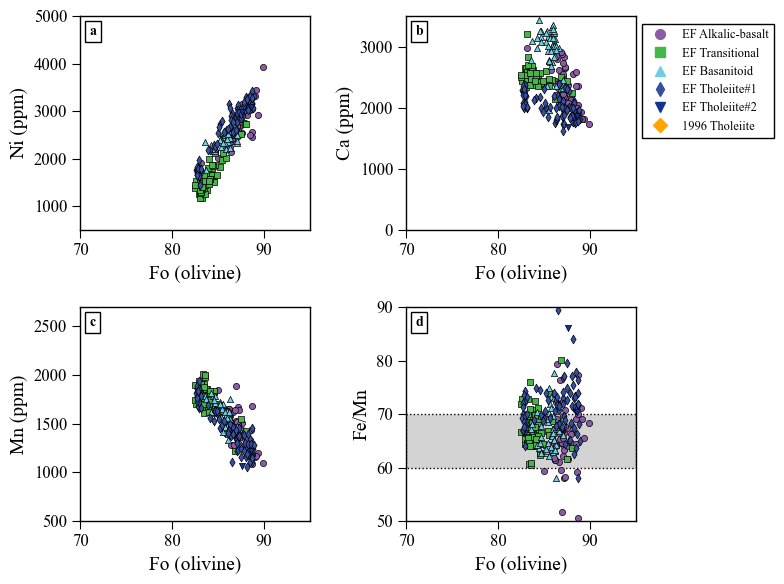

In [146]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

color_dict = {
    "KA71": {'color': '#8A5CA6', 'marker': 'o'},  
    "KA69": {'color': '#46B649', 'marker': 's'},  
    "KA611": {'color': '#6FCDE4', 'marker': '^'},  
    "KA79": {'color': '#374FA2', 'marker': 'd'},  
    "KA78": {'color': '#113393', 'marker': 'v'},  
    "KA961": {'color': 'orange', 'marker': 'D'}   
}

label_dict = {
    "KA71": "EF Alkalic-basalt",
    "KA69": "EF Transitional",
    "KA611": "EF Basanitoid",
    "KA79": "EF Tholeiite#1",
    "KA78": "EF Tholeiite#2",
    "KA961": "1996 Tholeiite"

}

fig,axs=plt.subplots(2,2,figsize=(8,6))
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')



for rock_type, color_info in color_dict.items():
    rock_data = ols[ols['Sample'] == rock_type]
    colors = color_info['color']
    markers = color_info['marker']
    
    # Scatter plot with the updated color and marker style
    axs[0,0].scatter(rock_data['Fo_host'], rock_data['Ni_ppm'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[0,1].scatter(rock_data['Fo_host'], rock_data['Ca_ppm'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[1,0].scatter(rock_data['Fo_host'], rock_data['Mn_ppm'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[1,1].scatter(rock_data['Fo_host'], rock_data['Fe_ppm']/rock_data['Mn_ppm'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)

axs[1,1].fill_between([70,95],60,70, color='lightgrey', alpha=1,edgecolor='black', linewidth=1, linestyle=':',zorder=-3)


axs[0,0].set_xlabel("Fo (olivine)")
axs[0,1].set_xlabel("Fo (olivine)")
axs[1,0].set_xlabel("Fo (olivine)")
axs[1,1].set_xlabel("Fo (olivine)")

axs[0,0].set_ylabel("Ni (ppm)")
axs[0,1].set_ylabel("Ca (ppm)")
axs[1,0].set_ylabel("Mn (ppm)")
axs[1,1].set_ylabel("Fe/Mn")

axs[0,0].set_xlim(70,95)
axs[0,1].set_xlim(70,95)
axs[1,0].set_xlim(70,95)
axs[1,1].set_xlim(70,95)
axs[0,0].set_ylim(500,5000)
axs[0,1].set_ylim(0,3500)
axs[1,0].set_ylim(500,2700)
axs[1,1].set_ylim(50,90)

pos=(0.04,0.91)

axs[0,0].text(pos[0], pos[1], 'a', transform=axs[0,0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[0,1].text(pos[0], pos[1], 'b', transform=axs[0,1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[1,0].text(pos[0], pos[1], 'c', transform=axs[1,0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[1,1].text(pos[0], pos[1], 'd', transform=axs[1,1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)


legend_handles = []
legend_labels = []

for rock_type, color_info in color_dict.items():
    # Create a Line2D object for each marker and color
    marker_handle = mlines.Line2D([], [], color=color_info['color'], marker=color_info['marker'], 
                                  markersize=7, linestyle='None')  # No line, just marker
    legend_handles.append(marker_handle)
    legend_labels.append(rock_type)

# Map the rock type codes to their full labels
legend_labels_updated = [label_dict.get(code, 'Unknown') for code in legend_labels]

# Plot the legend
axs[0,1].legend(handles=legend_handles, labels=legend_labels_updated, 
              loc='upper left', framealpha=1, edgecolor='black', fontsize=9, 
              ncol=1, bbox_to_anchor=(1, 0.99))

fig.tight_layout()